# Mr.Kulkarni V.V.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
training_set=pd.read_excel("Data_Train.xlsx")
test_set=pd.read_excel("Test_set.xlsx")

In [3]:
training_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Training Dataset
print("EDA ON TRAINING DATASET")
print("FEATURES/COLUMN")
print(training_set.columns)
print("NUMBER OF FEATURES/COLUMN")
print(len(training_set.columns))
print("NUMBER OF ROWS")
print(len(training_set))
print("DATA TYPES")
print(training_set.dtypes)
print("CONTAINS NAN/EMPTY CELLS")
print(training_set.isnull().values.any())
print("TOTAL EMPTY CELLS BY COLUMN")
print(training_set.isnull().sum())

EDA ON TRAINING DATASET
FEATURES/COLUMN
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
NUMBER OF FEATURES/COLUMN
11
NUMBER OF ROWS
10683
DATA TYPES
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
CONTAINS NAN/EMPTY CELLS
True
TOTAL EMPTY CELLS BY COLUMN
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [5]:
training_set.isnull().values.any()

True

In [6]:
training_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Test Dataset
print("EDA ON TRAINING DATASET")
print("FEATURES/COLUMN")
print(test_set.columns)
print("NUMBER OF FEATURES/COLUMN")
print(len(test_set.columns))
print("NUMBER OF ROWS")
print(len(test_set))
print("DATA TYPES")
print(test_set.dtypes)
print("CONTAINS NAN/EMPTY CELLS")
print(test_set.isnull().values.any())
print("TOTAL EMPTY CELLS BY COLUMN")
print(test_set.isnull().sum())

EDA ON TRAINING DATASET
FEATURES/COLUMN
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')
NUMBER OF FEATURES/COLUMN
10
NUMBER OF ROWS
2671
DATA TYPES
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object
CONTAINS NAN/EMPTY CELLS
False
TOTAL EMPTY CELLS BY COLUMN
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [8]:
training_set=training_set.dropna()

In [9]:
#Only one NaN value
len(training_set)

10682

# converting the data type to data-time format and adding new columns

In [10]:
training_set['Journey_Day']=pd.to_datetime(training_set['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [11]:
training_set['Journey_Month']=pd.to_datetime(training_set['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [12]:
training_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
#Test_set
test_set['Journey_Day']=pd.to_datetime(test_set['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_set['Journey_Month']=pd.to_datetime(test_set['Date_of_Journey'],format='%d/%m/%Y').dt.month
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [14]:
training_set.drop(labels='Date_of_Journey',axis=1,inplace=True)
training_set.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [15]:
test_set.drop(labels='Date_of_Journey',axis=1,inplace=True)
test_set.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5


In [16]:
#checking all the datatypes of Column
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  int64 
 11  Journey_Month    10682 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 709.4+ KB


# Our duration column had time written in this format 2h 50m . 
# To help machine learning algorithm derive useful insights, we will convert this text into numeric.



In [17]:
training_set['Duration_hrs']=training_set['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [18]:
training_set['Duration_min']=training_set['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [19]:
training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,45


In [20]:
#Test Dataset
test_set['Duration_hrs']=test_set['Duration'].str.split(' ').str[0].str.split('h').str[0]
test_set['Duration_min']=test_set['Duration'].str.split(' ').str[1].str.split('m').str[0]
test_set.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hrs,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,4,NaN


In [21]:
#To drop Duration Columns from training & test dataset
training_set.drop(labels='Duration',axis=1,inplace=True)
test_set.drop(labels='Duration',axis=1,inplace=True)

In [22]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  Duration_hrs     10682 non-null  object
 12  Duration_min     9650 non-null   object
dtypes: int64(3), object(10)
memory usage: 751.1+ KB


In [23]:
training_set[training_set['Duration_hrs']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,2 stops,No info,17327,6,3,5m,NaN


In [24]:
training_set.drop(6474,axis=0,inplace=True)

In [25]:
training_set['Duration_hrs']=training_set['Duration_hrs'].astype('int64')

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration_min'>

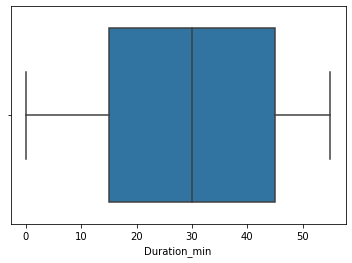

In [30]:
#To check whether their are outliers in Duration_min Feature
sns.boxplot(training_set['Duration_min'])

In [27]:
#Total number of NaN values in Duration Column
training_set['Duration_min'].isna().sum()

1031

In [28]:
training_set['Duration_min'].fillna('0',inplace=True)

In [29]:
training_set['Duration_min']=training_set['Duration_min'].astype('int64')

In [31]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Dep_Time         10681 non-null  object
 5   Arrival_Time     10681 non-null  object
 6   Total_Stops      10681 non-null  object
 7   Additional_Info  10681 non-null  object
 8   Price            10681 non-null  int64 
 9   Journey_Day      10681 non-null  int64 
 10  Journey_Month    10681 non-null  int64 
 11  Duration_hrs     10681 non-null  int64 
 12  Duration_min     10681 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 834.5+ KB


In [32]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
 8   Journey_Day      2671 non-null   int64 
 9   Journey_Month    2671 non-null   int64 
 10  Duration_hrs     2671 non-null   object
 11  Duration_min     2417 non-null   object
dtypes: int64(2), object(10)
memory usage: 146.1+ KB


In [33]:
#To Find the record with 5m value
test_set[test_set['Duration_hrs']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hrs,Duration_min
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,2 stops,No info,12,3,5m,NaN


In [34]:
test_set.drop(2660,axis=0,inplace=True)

In [35]:
test_set['Duration_hrs']=test_set['Duration_hrs'].astype('int64')

In [36]:
print("Total number of NaN values in Test Dataset")
print(test_set['Duration_min'].isna().sum())

Total number of NaN values in Test Dataset
253


In [37]:
test_set['Duration_min'].fillna('0',inplace=True)

In [38]:
test_set['Duration_min']=test_set['Duration_min'].astype('int64')

In [39]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2670 non-null   object
 1   Source           2670 non-null   object
 2   Destination      2670 non-null   object
 3   Route            2670 non-null   object
 4   Dep_Time         2670 non-null   object
 5   Arrival_Time     2670 non-null   object
 6   Total_Stops      2670 non-null   object
 7   Additional_Info  2670 non-null   object
 8   Journey_Day      2670 non-null   int64 
 9   Journey_Month    2670 non-null   int64 
 10  Duration_hrs     2670 non-null   int64 
 11  Duration_min     2670 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 187.7+ KB


In [40]:
#Converting 'Dep_Time' to 'Depart_Time_hour' and 'Depart_time_Minutes'
training_set['Depart_Time_Hour']=pd.to_datetime(training_set['Dep_Time']).dt.hour
training_set['Depart_Time_Hour']=pd.to_datetime(training_set['Dep_Time']).dt.minute
training_set.drop(labels='Dep_Time',axis=1,inplace=True)
training_set.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_min,Depart_Time_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2,50,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,7,25,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,19,0,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,5,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,4,45,50


In [41]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10681 non-null  object
 1   Source            10681 non-null  object
 2   Destination       10681 non-null  object
 3   Route             10681 non-null  object
 4   Arrival_Time      10681 non-null  object
 5   Total_Stops       10681 non-null  object
 6   Additional_Info   10681 non-null  object
 7   Price             10681 non-null  int64 
 8   Journey_Day       10681 non-null  int64 
 9   Journey_Month     10681 non-null  int64 
 10  Duration_hrs      10681 non-null  int64 
 11  Duration_min      10681 non-null  int64 
 12  Depart_Time_Hour  10681 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 876.2+ KB


In [42]:
#Converting 'Arr_Time' to 'Arr_Time_hour' and 'Arr_time_Minutes' and dropping the original column
training_set['Arr_Time_Hour']=pd.to_datetime(training_set['Arrival_Time']).dt.hour
training_set['Arr_Time_Minutes']=pd.to_datetime(training_set['Arrival_Time']).dt.minute
training_set.drop(labels='Arrival_Time',axis=1,inplace=True)
training_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_min,Depart_Time_Hour,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,50,21,35


In [43]:
#Applying the same to test set
test_set['Depart_Time_Hour']=pd.to_datetime(test_set['Dep_Time']).dt.hour
test_set['Depart_Time_Hour']=pd.to_datetime(test_set['Dep_Time']).dt.minute
test_set.drop(labels='Dep_Time',axis=1,inplace=True)
test_set.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hrs,Duration_min,Depart_Time_Hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,6,6,10,55,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,12,5,4,0,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,21,5,23,45,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,1 stop,No info,21,5,13,0,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,non-stop,No info,24,6,2,50,55


In [44]:
#Applying the same to test set
test_set['Arr_Time_Hour']=pd.to_datetime(test_set['Arrival_Time']).dt.hour
test_set['Arr_Time_Minutes']=pd.to_datetime(test_set['Arrival_Time']).dt.minute
test_set.drop(labels='Arrival_Time',axis=1,inplace=True)
test_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hrs,Duration_min,Depart_Time_Hour,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,55,2,45


In [45]:
training_set['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [46]:
#To replace the Total_stops Feature in Training Data
training_set['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [47]:
training_set['Total_Stops']=training_set['Total_Stops'].map({'non-stop':0,
                                                            '1 stop':1,
                                                    '2 stops':2,
                                                    '3 stops':3,
                                                    '4 stops':4})

In [48]:
#To replace the Total_stops Feature in Test Data
test_set['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [49]:
test_set['Total_Stops']=test_set['Total_Stops'].map({'non-stop':0,
                                                            '1 stop':1,
                                                    '2 stops':2,
                                                    '3 stops':3,
                                                    '4 stops':4})

In [50]:
training_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_min,Depart_Time_Hour,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2,50,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,7,25,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,19,0,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,5,25,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,4,45,50,21,35


In [51]:
Y_train = training_set.iloc[:,6].values  # 6 is the index of "Price" in the Training Set , setting it as the label column

# Independent Variables
X_train = training_set.iloc[:,training_set.columns != 'Price'].values # selects all columns except "Price"

# Independent Variables for Test Set
X_test = test_set.iloc[:,:].values

X_train

array([['IndiGo', 'Banglore', 'New Delhi', ..., 20, 1, 10],
       ['Air India', 'Kolkata', 'Banglore', ..., 50, 13, 15],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 25, 4, 25],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 20, 11, 20],
       ['Vistara', 'Banglore', 'New Delhi', ..., 30, 14, 10],
       ['Air India', 'Delhi', 'Cochin', ..., 55, 19, 15]], dtype=object)

In [52]:
# From the info above it could be observed that many colmns are of object type. So, converting those categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

In [53]:
X_train[:,0] = le1.fit_transform(X_train[:,0])
X_train

array([[3, 'Banglore', 'New Delhi', ..., 20, 1, 10],
       [1, 'Kolkata', 'Banglore', ..., 50, 13, 15],
       [4, 'Delhi', 'Cochin', ..., 25, 4, 25],
       ...,
       [4, 'Banglore', 'Delhi', ..., 20, 11, 20],
       [10, 'Banglore', 'New Delhi', ..., 30, 14, 10],
       [1, 'Delhi', 'Cochin', ..., 55, 19, 15]], dtype=object)

In [54]:
X_train[:,1] = le1.fit_transform(X_train[:,1])
X_train

array([[3, 0, 'New Delhi', ..., 20, 1, 10],
       [1, 3, 'Banglore', ..., 50, 13, 15],
       [4, 2, 'Cochin', ..., 25, 4, 25],
       ...,
       [4, 0, 'Delhi', ..., 20, 11, 20],
       [10, 0, 'New Delhi', ..., 30, 14, 10],
       [1, 2, 'Cochin', ..., 55, 19, 15]], dtype=object)

In [55]:
X_train[:,2] = le1.fit_transform(X_train[:,2])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

In [56]:
X_train[:,3] = le1.fit_transform(X_train[:,3])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

In [57]:
X_train[:,4] = le1.fit_transform(X_train[:,4])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

In [58]:
X_train[:,5] = le1.fit_transform(X_train[:,5])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

# Applying similar operations on the Test Set

In [59]:
X_test[:,0] = le2.fit_transform(X_test[:,0])

X_test[:,1] = le2.fit_transform(X_test[:,1])

X_test[:,2] = le2.fit_transform(X_test[:,2])

X_test[:,3] = le2.fit_transform(X_test[:,3])

X_test[:,4] = le2.fit_transform(X_test[:,4])

X_test[:,5] = le2.fit_transform(X_test[:,5])
X_test

array([[4, 2, 1, ..., 30, 4, 25],
       [3, 3, 0, ..., 20, 10, 20],
       [4, 2, 1, ..., 15, 19, 0],
       ...,
       [4, 2, 1, ..., 50, 4, 25],
       [1, 2, 1, ..., 0, 19, 15],
       [6, 2, 1, ..., 55, 19, 15]], dtype=object)

In [60]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

In [61]:
X_train = sc_X.fit_transform(X_train)
X_train

array([[-0.41093428, -1.65835388,  2.41664751, ..., -0.23483168,
        -1.80032841, -0.88994081],
       [-1.26130512,  0.89026163, -0.97371843, ...,  1.36378986,
        -0.05087092, -0.58698767],
       [ 0.01425114,  0.04072313, -0.29564524, ...,  0.03160524,
        -1.36296404,  0.01891862],
       ...,
       [ 0.01425114, -1.65835388,  0.38242795, ..., -0.23483168,
        -0.34244717, -0.28403453],
       [ 2.56536364, -1.65835388,  2.41664751, ...,  0.29804216,
         0.0949172 , -0.88994081],
       [-1.26130512,  0.04072313, -0.29564524, ...,  1.63022678,
         0.82385782, -0.58698767]])

In [62]:
X_test = sc_X.transform(X_test)
X_test

array([[ 0.01425114,  0.04072313, -0.29564524, ...,  0.29804216,
        -1.36296404,  0.01891862],
       [-0.41093428,  0.89026163, -0.97371843, ..., -0.23483168,
        -0.4882353 , -0.28403453],
       [ 0.01425114,  0.04072313, -0.29564524, ..., -0.50126861,
         0.82385782, -1.4958471 ],
       ...,
       [ 0.01425114,  0.04072313, -0.29564524, ...,  1.36378986,
        -1.36296404,  0.01891862],
       [-1.26130512,  0.04072313, -0.29564524, ..., -1.30057937,
         0.82385782, -0.58698767],
       [ 0.86462197,  0.04072313, -0.29564524, ...,  1.63022678,
         0.82385782, -0.58698767]])

In [63]:
# applying similar operation on the Y labels
Y_train = Y_train.reshape((len(Y_train), 1)) 
Y_train = sc_X.fit_transform(Y_train)
Y_train = Y_train.ravel()
Y_train

array([-1.12548281, -0.30893223,  1.04005704, ..., -0.40284097,
        0.77242798,  0.578321  ])

We have our training and test data sets seperated which can be used to build a machine learning model now.